Jefter Santiago Mares

12559016 

jefter@usp.br

# Notebook setup


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from networkx.algorithms.community import greedy_modularity_communities

from community import community_louvain
from networkx.algorithms.community import louvain_communities


In [ ]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

# 1 - Modularity for the `Jazz` network

In [ ]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Complex Networks/Project 4/data/jazz.txt", nodetype=int)

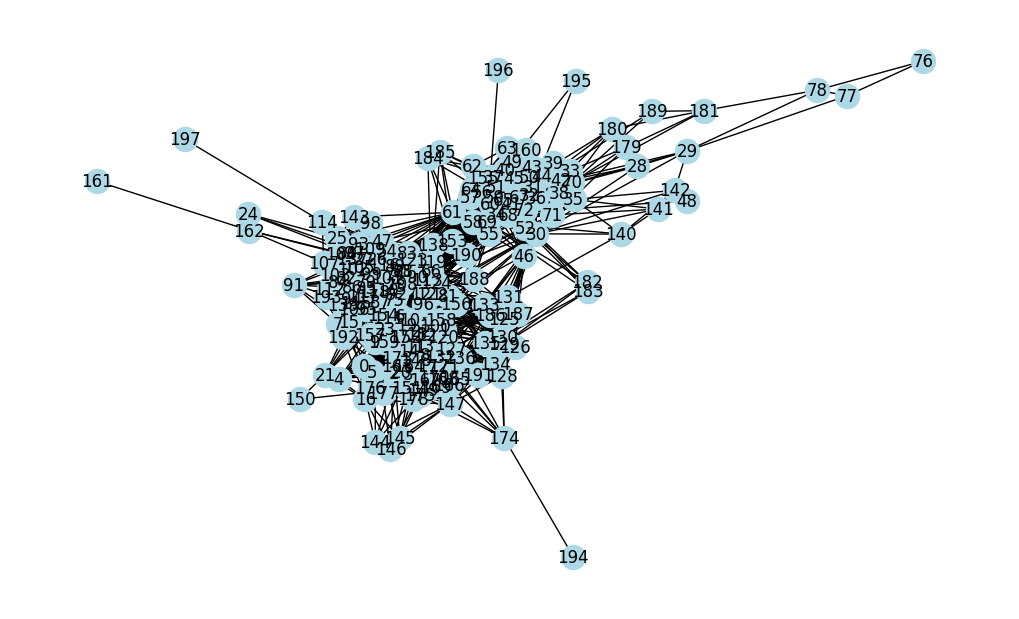

In [ ]:
g.remove_edges_from(nx.selfloop_edges(g))
g = g.to_undirected()
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
g = g.subgraph(Gcc[0])
g = nx.convert_node_labels_to_integers(g, first_label=0)


pos=nx.spring_layout(g)
fig=plt.figure(figsize=(10,6))
nx.draw(g, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

In [ ]:
communities = list(greedy_modularity_communities(g))
print("Modularity = ", nx.community.modularity(g, communities))

Modularity =  0.43890781537538287


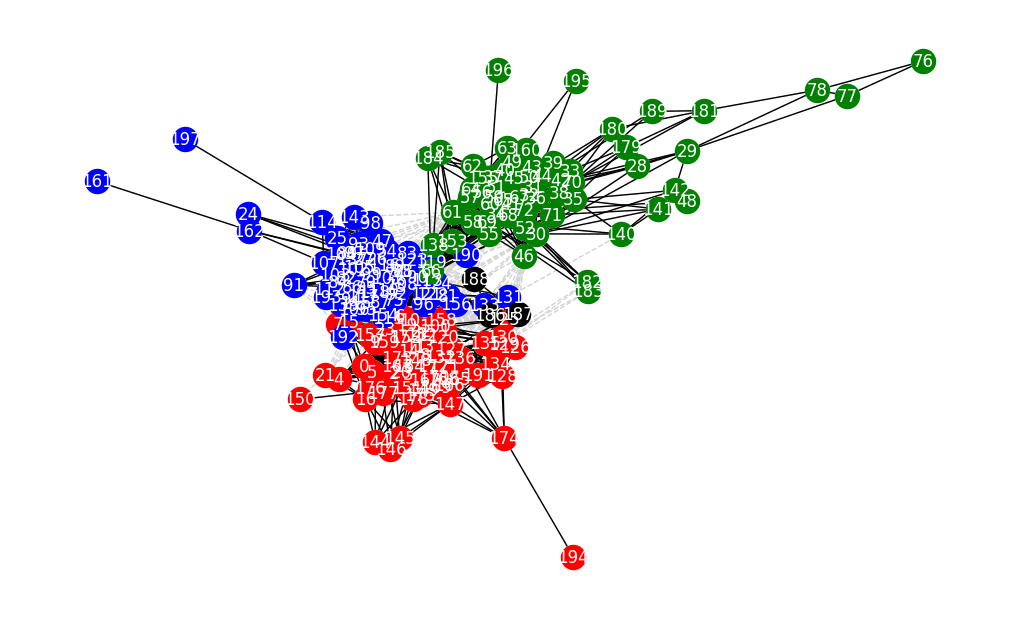

In [ ]:
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

fig= plt.figure(figsize=(10,6))
nx.draw(g, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(g.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.show(True)

# 2 - Modularity for the `Jazz` network - Louvain Method

In [ ]:
partitions = community_louvain.best_partition(g)
print(partitions)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 1, 25: 1, 26: 1, 27: 1, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 1, 48: 2, 49: 2, 50: 2, 51: 2, 52: 2, 53: 1, 54: 1, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 1, 74: 1, 75: 1, 76: 2, 77: 2, 78: 2, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 3, 95: 3, 96: 3, 97: 1, 98: 1, 99: 1, 100: 0, 101: 3, 102: 1, 103: 1, 104: 1, 105: 1, 106: 3, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 3, 113: 1, 114: 1, 115: 3, 116: 1, 117: 3, 118: 1, 119: 1, 120: 0, 121: 3, 122: 3, 123: 1, 124: 1, 125: 3, 126: 0, 127: 0, 128: 0, 129: 0, 130: 3, 131: 3, 132: 0, 133: 3, 134: 0, 135: 0, 136: 0, 137: 1, 138: 

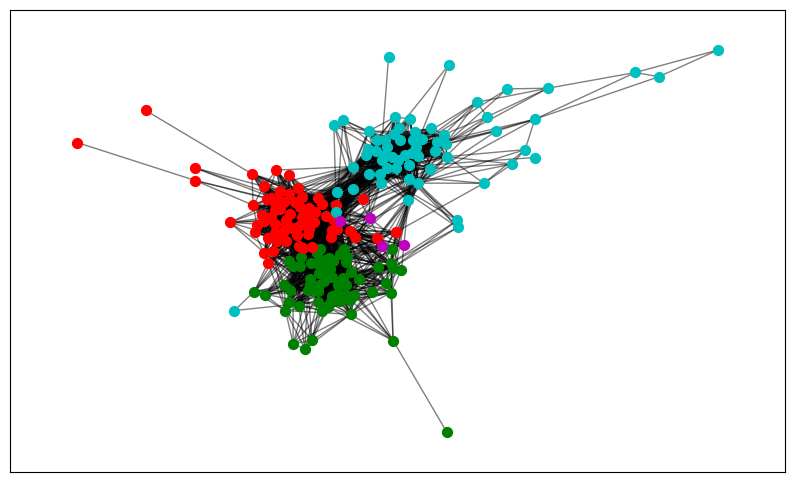

In [ ]:
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partitions.values())))
count = 0
for com in set(partitions.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partitions.keys() if partitions[nodes] == com]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()

In [ ]:
c = list(louvain_communities(g))
communities = np.zeros(len(g.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc
    nc = nc+1
    print('Community:', sorted(c[k]))

Community: [66, 94, 95, 96, 101, 106, 112, 115, 117, 121, 122, 131, 133, 150, 154, 186, 187, 188, 193]
Community: [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 100, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 151, 152, 156, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community: [7, 9, 15, 24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 97, 98, 99, 102, 103, 104, 105, 107, 108, 109, 110, 111, 113, 114, 116, 118, 119, 123, 124, 137, 139, 143, 157, 158, 159, 161, 162, 190, 192, 197]


In [ ]:
print("Modularity Q = ", modularity(g,communities))

Modularity Q =  0.441682813367013


# 3 - `LRF_benchmark_graph` method for various $\mu$ values - Louvain Method

$$ \mu = 0.05 $$

In [ ]:
def lrf_benchmark_graph_mu(mu):
  N = 128
  tau1 = 3
  tau2 = 1.5
  k =16
  minc = 32
  maxc = 32
  G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
  pos=nx.spring_layout(G)
  fig= plt.figure(figsize=(10,6))
  nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
  plt.show(True)
  print('kin=', k*mu*4)


  c = list(louvain_communities(G))
  communities = np.zeros(len(G.nodes()))
  nc = 0
  for k in range(0,len(c)):
      communities[sorted(c[k])]=nc
      nc = nc+1
      print('Community:', sorted(c[k]))
  
  print("Modularity Q = ", modularity(G,communities))

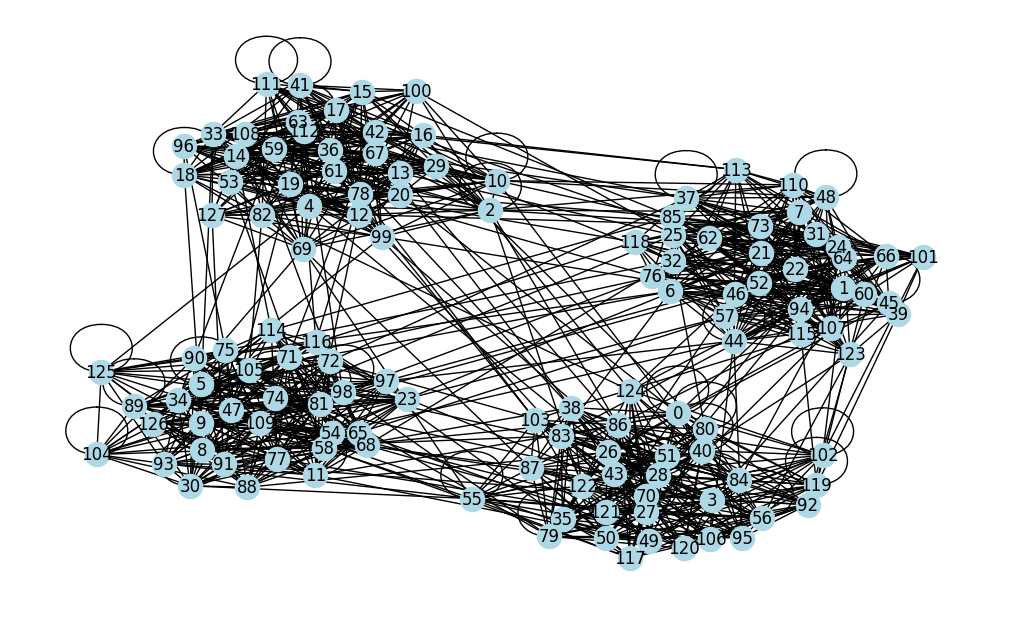

kin= 3.2
Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community: [2, 4, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community: [1, 6, 7, 21, 22, 24, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Modularity Q =  0.6414502290712024


In [ ]:
lrf_benchmark_graph_mu(0.05)

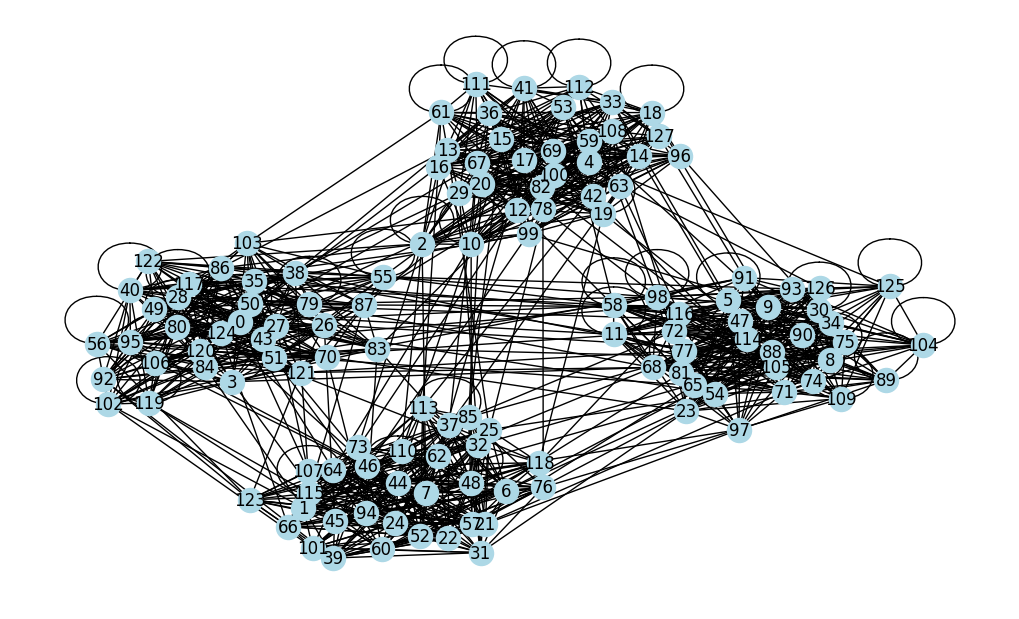

kin= 2.56
Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community: [1, 6, 7, 21, 22, 24, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community: [2, 4, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Modularity Q =  0.6414502290712024


In [ ]:
lrf_benchmark_graph_mu(0.04)

$$ \mu = 0.01 $$ 


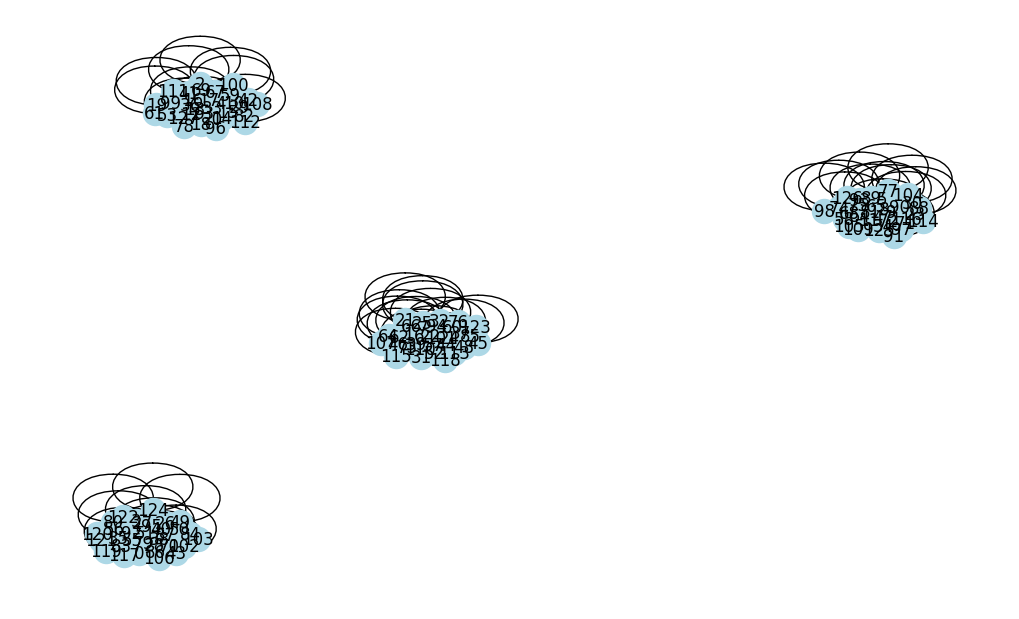

kin= 1.28
Community: [2, 4, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community: [1, 6, 7, 21, 22, 24, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Modularity Q =  0.7398493534857167


In [ ]:
lrf_benchmark_graph_mu(0.02)